## EN2550: Assignment 03 on Object Counting on a Conveyor Belt


Index No.&nbsp;&nbsp;:&nbsp;190018V

Name&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;Abeywickrama K.C.S.

Github &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;:&nbsp;https://github.com/KCSAbeywickrama/EN2550-Excercises/tree/master/Assignment_03

## Connected Component Analysis

In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.

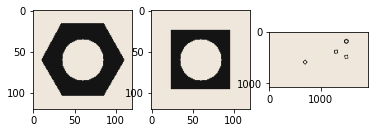

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_BGR2RGB))
plt.show()

Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.

In [2]:
# convert to grayscale
hexnut_template=cv.cvtColor(hexnut_template,cv.COLOR_BGR2GRAY)
squarenut_template=cv.cvtColor(squarenut_template,cv.COLOR_BGR2GRAY)
conveyor_f100=cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)

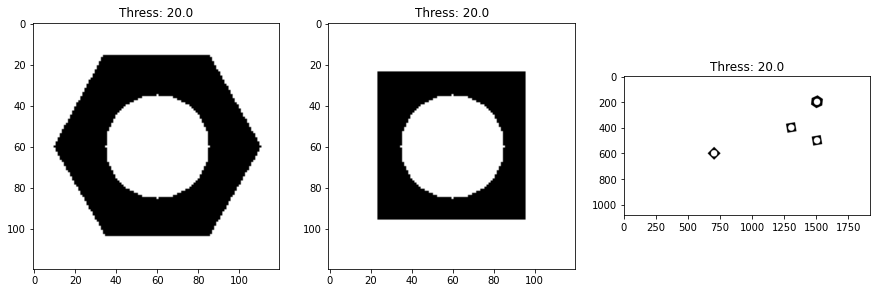

In [3]:

# Otsu's thresholding
hexnut_value,hexnut_th = cv.threshold(hexnut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
squarenut_value,squarenut_th = cv.threshold(squarenut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
convyr_value,convyr_th = cv.threshold(conveyor_f100,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

fig, ax = plt. subplots(1,3,figsize=(15,15))
ax[0].imshow(hexnut_th, plt.cm.gray)
ax[0].set_title("Thress: "+str(hexnut_value))

ax[1].imshow(squarenut_th, plt.cm.gray)
ax[1].set_title("Thress: "+str(squarenut_value))

ax[2].imshow(convyr_th,plt.cm.gray )
ax[2].set_title("Thress: "+str(convyr_value))

plt.show()

Threshold values = 20.0

The fucntions supposed to use in the rest expects white forground & black background. So invertion needed

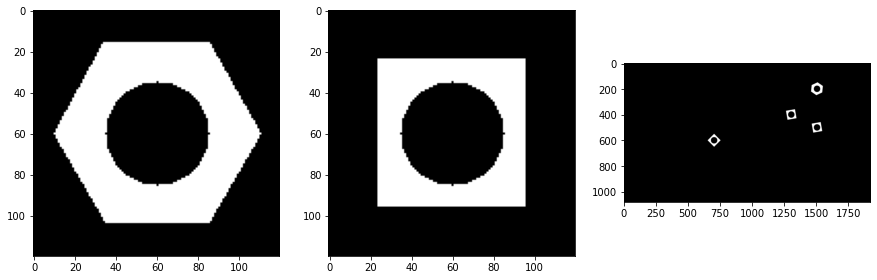

In [4]:
hexnut=cv.bitwise_not(hexnut_th)
sqrnut=cv.bitwise_not(squarenut_th)
convyr=cv.bitwise_not(convyr_th)

fig, ax = plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(hexnut, plt.cm.gray)
ax[1].imshow(sqrnut, plt.cm.gray)
ax[2].imshow(convyr,plt.cm.gray )
plt.show()

Carry out morphological closing to remove small holes inside the foreground. Use a 3x3
kernel. See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.

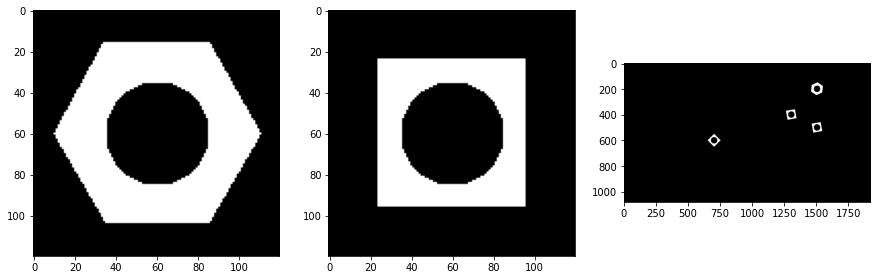

In [5]:

kernel = np.ones((3,3),np.uint8)
hexnut = cv.morphologyEx(hexnut, cv.MORPH_CLOSE, kernel)
sqrnut = cv.morphologyEx(sqrnut, cv.MORPH_CLOSE, kernel)
convyr = cv.morphologyEx(convyr, cv.MORPH_CLOSE, kernel)

fig, ax = plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(hexnut, plt.cm.gray)
ax[1].imshow(sqrnut, plt.cm.gray)
ax[2].imshow(convyr,plt.cm.gray )
plt.show()


Connected components analysis: apply the connectedComponentsWithStats function (see https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) and display the outputs as colormapped images. 
Answer the following questions

How many connected components are detected in each image?

What are the statistics? Interpret these statistics.

What are the centroids?

For the hexnut template, you should get the object area in pixel as approximately 4728.

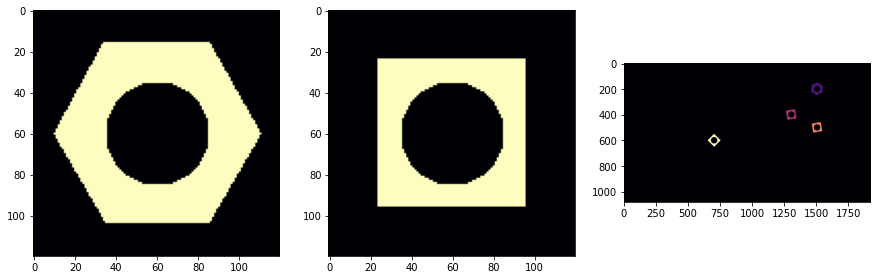

In [6]:
hex_n, hex_labels, hex_stats, hex_centroids=cv.connectedComponentsWithStats(hexnut)
sqr_n, sqr_labels, sqr_stats, sqr_centroids=cv.connectedComponentsWithStats(sqrnut)
cnv_n, cnv_labels, cnv_stats, cnv_centroids=cv.connectedComponentsWithStats(convyr)

colormap=cv.COLORMAP_MAGMA
hex_labels=np.uint8(cv.normalize(hex_labels,None,0,255,cv.NORM_MINMAX))
hex_labels=cv.applyColorMap(hex_labels,colormap)

sqr_labels=np.uint8(cv.normalize(sqr_labels,None,0,255,cv.NORM_MINMAX))
sqr_labels=cv.applyColorMap(sqr_labels,colormap)

cnv_labels=np.uint8(cv.normalize(cnv_labels,None,0,255,cv.NORM_MINMAX))
cnv_labels=cv.applyColorMap(cnv_labels,colormap)

fig, ax = plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(cv.cvtColor(hex_labels,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(sqr_labels,cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(cnv_labels,cv.COLOR_BGR2RGB))
plt.show()

In [7]:
# How many connected components are detected in each image?
print("Number of connected components")
print("hexanut\t :",hex_n)
print("sqrnut\t :",sqr_n)
print("conveyor :",cnv_n)

Number of connected components
hexanut	 : 2
sqrnut	 : 2
conveyor : 5


Backround is also considered as a connected component. So withot considering backgound as component,


Number of connected components

hexanut	 : 1

squarenut	 : 1

conveyor : 4

&nbsp;

Q: What are the statistics? Interpret these statistics.

A: It is a 2D array which contains detials of each detected connected component. Interpretaion has coded below. 

**0th components means backgound.**

In [8]:
print('hexanut stats\n')

for i in range(hex_n):
    print('Component',i)
    print(hex_stats[i][cv.CC_STAT_LEFT],'\t:','The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.')
    print(hex_stats[i][cv.CC_STAT_TOP],'\t:','The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.')
    print(hex_stats[i][cv.CC_STAT_WIDTH],'\t:','The horizontal size of the bounding box.')
    print(hex_stats[i][cv.CC_STAT_HEIGHT],'\t:','The vertical size of the bounding box.')
    print(hex_stats[i][cv.CC_STAT_AREA],'\t:','The total area (in pixels) of the connected component.')
    print()

hexanut stats

Component 0
0 	: The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
0 	: The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
120 	: The horizontal size of the bounding box.
120 	: The vertical size of the bounding box.
9672 	: The total area (in pixels) of the connected component.

Component 1
10 	: The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
16 	: The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
101 	: The horizontal size of the bounding box.
88 	: The vertical size of the bounding box.
4728 	: The total area (in pixels) of the connected component.



In [9]:
print('sqrnut stats\n')

for i in range(sqr_n):
    print('Component',i)
    print(sqr_stats[i][cv.CC_STAT_LEFT],'\t:','The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.')
    print(sqr_stats[i][cv.CC_STAT_TOP],'\t:','The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.')
    print(sqr_stats[i][cv.CC_STAT_WIDTH],'\t:','The horizontal size of the bounding box.')
    print(sqr_stats[i][cv.CC_STAT_HEIGHT],'\t:','The vertical size of the bounding box.')
    print(sqr_stats[i][cv.CC_STAT_AREA],'\t:','The total area (in pixels) of the connected component.')
    print()

sqrnut stats

Component 0
0 	: The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
0 	: The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
120 	: The horizontal size of the bounding box.
120 	: The vertical size of the bounding box.
11173 	: The total area (in pixels) of the connected component.

Component 1
24 	: The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
24 	: The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
72 	: The horizontal size of the bounding box.
72 	: The vertical size of the bounding box.
3227 	: The total area (in pixels) of the connected component.



In [10]:
print('Conveyor stats\n')

for i in range(cnv_n):
    print('Component',i)
    print(cnv_stats[i][cv.CC_STAT_LEFT],'\t:','The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.')
    print(cnv_stats[i][cv.CC_STAT_TOP],'\t:','The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.')
    print(cnv_stats[i][cv.CC_STAT_WIDTH],'\t:','The horizontal size of the bounding box.')
    print(cnv_stats[i][cv.CC_STAT_HEIGHT],'\t:','The vertical size of the bounding box.')
    print(cnv_stats[i][cv.CC_STAT_AREA],'\t:','The total area (in pixels) of the connected component.')
    print()

Conveyor stats

Component 0
0 	: The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
0 	: The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
1920 	: The horizontal size of the bounding box.
1080 	: The vertical size of the bounding box.
2059646 	: The total area (in pixels) of the connected component.

Component 1
1454 	: The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
150 	: The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
92 	: The horizontal size of the bounding box.
100 	: The vertical size of the bounding box.
4636 	: The total area (in pixels) of the connected component.

Component 2
1259 	: The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
359 	: The topmost (y) coordinate which is the inclusive start of the b

Q: What are the centroids?

A: array which contains centroids of each connected component

In [11]:
print('Hexanut Centroids')
for i in range(hex_n):
    print('Component',i,':',hex_centroids[i])

print('\nSquarenut Centroids')
for i in range(sqr_n):
    print('Component',i,':',sqr_centroids[i])

print('\nConveyor Centroids')
for i in range(cnv_n):
    print('Component',i,':',cnv_centroids[i])


Hexanut Centroids
Component 0 : [59.33684864 59.63513234]
Component 1 : [59.83375635 59.22356176]

Squarenut Centroids
Component 0 : [59.5875772 59.5875772]
Component 1 : [59.19677719 59.19677719]

Conveyor Centroids
Component 0 : [957.36323524 540.44416273]
Component 1 : [1499.24201898  199.28515962]
Component 2 : [1299.18302559  399.18302559]
Component 3 : [1499.18302559  499.18302559]
Component 4 : [700. 600.]


Contour analysis: Use findContours function to retrieve the extreme outer contours. (see https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html for help and https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0 for information.

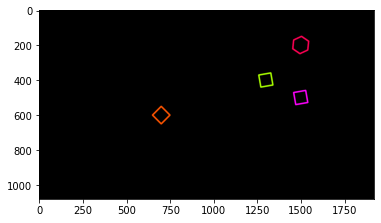

In [48]:
contours, hierarchy = cv.findContours(convyr, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cont_draw=np.zeros((*convyr.shape,3),dtype=np.uint8)
for i in range(len(contours)):    
    cont_draw=cv.drawContours(cont_draw,contours,i,(np.random.randint(18)*10,255,255),8)

plt.imshow(cv.cvtColor(cont_draw,cv.COLOR_HSV2RGB))

Detecting Objects on a Synthetic Conveyor
In this section, we will use the synthetic conveyor.mp4 sequence to count the two types of nuts.

Open the sequence and play it using the code below.

In [13]:
cv.namedWindow('Conveyor',cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(2) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


Count the number of matching hexagonal nuts in conveyor_f100.png. You can use matchCountours function as shown in https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html to match contours in each frame with that in th template.

In [14]:
cont_conv_f100, hierarchy1 = cv.findContours(convyr, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cont_hex_templ,hierarchy2 = cv.findContours(hexnut, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

match_count=0
for cont in cont_conv_f100:
    match=cv.matchShapes(cont,cont_hex_templ[0],1,0)
    if match<0.005: match_count+=1

print("Number of matching hexagonal nuts:",match_count)

Number of matching hexagonal nuts: 1


In [67]:
cnt=cont_hex_templ[0]
np.min(cnt[:,:,0])
cnt[0]

array([[34, 16]], dtype=int32)

Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video. Please compress your video (using Handbreak or otherwise) before uploading. It would be good to experiment first with the two adjacent frames conveyor_f100.png and conveyor_f101.png. In order to disregard partially appearing nuts, consider comparing the contour area in addition to using the matchCountours function.

In [108]:
cv.namedWindow('Conveyor',cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame_array = []
shape = (1080, 1920, 3)
count_hex_total=0
count_sqr_total=0

color_hex=(255,0,255)
color_sqr=(255,70,0)
color_txt=(168, 50, 121)

cont_hex_templ, h1 = cv.findContours(hexnut, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cont_sqr_templ, h2= cv.findContours(sqrnut, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

while cap.isOpened():                                    
    ret, frame_bgr = cap.read()
    if not ret:  break

    frame=cv.cvtColor(frame_bgr,cv.COLOR_BGR2GRAY)
    line=frame.shape[1]//2   
    th_value,frame = cv.threshold(frame,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    frame=cv.bitwise_not(frame)
    
    frame = cv.morphologyEx(frame, cv.MORPH_CLOSE, kernel)    

    count_hex_frame=0
    count_sqr_frame=0

    conts, hi = cv.findContours(frame, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    for cont in conts:        
        if cv.matchShapes(cont,cont_sqr_templ[0],1,0)<0.005:
            count_sqr_frame+=1
            left=np.min(cont[:,:,0])
            if left<=line and left>(line-10):
                count_sqr_total+=1
            frame_bgr= cv.drawContours(frame_bgr,[cont],0,color_sqr,5)

        elif cv.matchShapes(cont,cont_hex_templ[0],1,0)<0.005:
            count_hex_frame+=1
            left=np.min(cont[:,:,0])
            if left<=line and left>(line-10):
                count_hex_total+=1
            frame_bgr= cv.drawContours(frame_bgr,[cont],0,color_hex,5)  
    
    f += 1
    text1 = 'Frame No:   {}'.format(f) 
    text2 = '          Current   Total'
    text3 = 'Hexanut     {}        {}'.format(count_hex_frame,count_hex_total)
    text4 = 'Squarenut   {}        {}'.format(count_sqr_frame,count_sqr_total)
    text5 = 'Total         {}        {}'.format(count_hex_frame+count_sqr_frame,count_hex_total+count_sqr_total)

    cv.putText(frame_bgr,text1 , (100, 90), cv.FONT_HERSHEY_COMPLEX, 1, color_txt, 1, cv.LINE_AA) 
    cv.putText(frame_bgr,text2 , (100, 150), cv.FONT_HERSHEY_COMPLEX, 1, color_txt, 1, cv.LINE_AA)    
    cv.putText(frame_bgr,text3 , (100, 200), cv.FONT_HERSHEY_COMPLEX, 1, color_hex, 1, cv.LINE_AA)
    cv.putText(frame_bgr,text4 , (100, 250), cv.FONT_HERSHEY_COMPLEX, 1, color_sqr, 1, cv.LINE_AA)
    cv.putText(frame_bgr,text5 , (100, 310), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1, cv.LINE_AA)
    
    cv.putText(frame_bgr,'Ref Line' , (line-65,30), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1, cv.LINE_AA)
    cv.line(frame_bgr,(line,50),(line,frame.shape[0]),(0,0,255),1)
    cv.imshow('Conveyor', frame_bgr)
    frame_array.append(frame_bgr)

    if cv.waitKey(2) == ord('q'):  
        break

cap.release()

out = cv.VideoWriter('./conveyor_result_190018V.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

**Ref Line** is used to count total number of objects